## Apply Beta-sigma SNR estimates on the CRIRES Spectra

Using the berved spectra

Should compare weith berved masked but assume it will be small differences.



In [1]:
from astropy.io import fits
import os
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def betasigma_spectra(file, Nmax=5, j=1, arb=False, returnMAD=True):
    
    # Solene you probably need to change this...
    #########
    data = fits.getdata(file)
    xi, yi = data["wavelength"], data["flux"]
    #########
    
    
    mdiff = np.max(np.abs(np.diff(yi)))
    # print("""Maximum absolute difference between consecutive
    #    values of flux: """, mdiff)

    nd = len(yi)
    # print("Number of 'data points': ", nd)
    # print()
    print("Very Rough std = {}".format(np.std(yi)))

    # Create class instance for equidistant sampling
    if arb:
        bsarb = pyasl.BSArbSamp()
    else:
        bseq = pyasl.BSEqSamp()
    
    # Specify jump parameter (j) for construction of beta sample
    j = j

    # Order of approximation to use
    Ns = range(Nmax+1)

    # Use to store noise estimates
    smads, dsmads = [], []

    # Loop over orders of approximation between 0 and 3
    for N in Ns:
        #print("Order of approximation (N): ", N)

        # Get estimates of standard deviation based on robust (MAD-based) estimator
        if arb:
            smad, dsmad = bsarb.betaSigma(xi, yi, N, j, returnMAD=returnMAD)
            #print("    Size of beta sample: ", len(bsarb.betaSample))
        else:
            smad, dsmad = bseq.betaSigma(yi, N, j, returnMAD=returnMAD)
            #print("    Size of beta sample: ", len(bseq.betaSample))
        #print("    Robust estimate of noise std: %6.5f +/- %6.5f" % (smad, dsmad))
        # Save result
        smads.append(smad)
        dsmads.append(dsmad)

    # Plot g(t) and the synthetic data
    plt.subplot(2,1,1)
    plt.title("Data (top) and noise estimates (bottom)")
    plt.plot(xi, yi, 'b.-', label="flux")
    #plt.errorbar(ti, yi, yerr=np.ones(nd)*istd, fmt='r+', label="$y_i$")
    plt.legend()
    plt.subplot(2,1,2)
    plt.title("N=0 is insufficient")
    plt.errorbar(Ns, smads, yerr=dsmads, fmt='k+', label="Noise estimates")
    #plt.plot([min(Ns)-0.5, max(Ns)+0.5], [np.std(flux)]*2, 'k--', label="Rough value")
    plt.legend()
    plt.xlabel("Order of approximation (N)")
    plt.ylabel("Noise STD")
    plt.tight_layout()
    plt.show()

# Single Jump at a time

File = HD30501-1-mixavg-tellcorr_1_bervcorr.fits
jump =1
Very Rough std = 0.035871438682079315


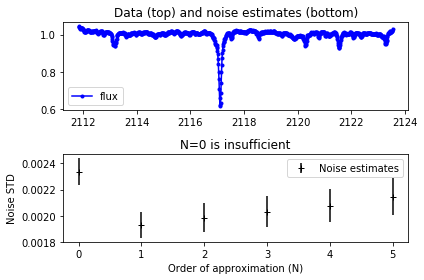

jump =1
Very Rough std = 0.035871438682079315


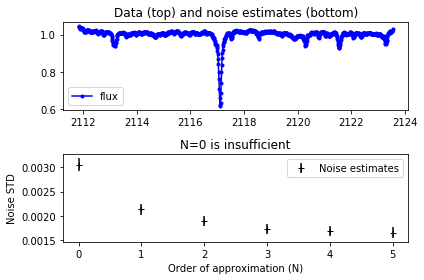

jump =3
Very Rough std = 0.035871438682079315


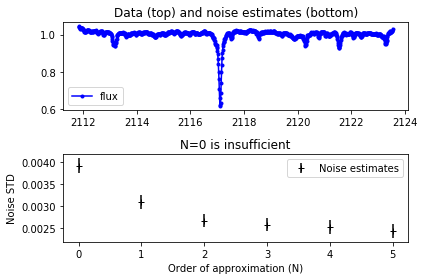

In [3]:
files = ["/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr.fits",
        ]

for file in files:
    print("File =", os.path.split(file)[-1])
    print("jump =1")
    betasigma_spectra(file)
    print("jump =1")
    betasigma_spectra(file, j=2)
    print("jump =3")
    betasigma_spectra(file, j=3)

In [4]:
def Betasigma_check(yi, N, j, **kwargs):
    "Checks adjacent orders for consistency"
    bseq = pyasl.BSEqSamp()
    smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
    smad1, dsmad1 = bseq.betaSigma(yi, N+1, j, **kwargs)
    print("Robust estimate of noise std 0(N): %6.5f +/- %6.5f" % (smad, dsmad))
    print("Robust estimate of noise std 0(N+1): %6.5f +/- %6.5f" % (smad1, dsmad1))
    if ( (smad1-dsmad1) < smad < (smad1+dsmad1) ) & ((smad-dsmad) < smad1 < (smad+dsmad) ):
        print("consistent")
    else:
        print(N, "and", N+1, "are not conisitent")
        
        
def Betasigma_j_check(yi, N, j,**kwargs):
    "Checks adjacent orders for consistency"
    bseq = pyasl.BSEqSamp()
    smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
    smad1, dsmad1 = bseq.betaSigma(yi, N, j+1, **kwargs)
    print("    Robust estimate of noise std j={}: {:6.5f} +/- {:6.5f}".format(j, smad, dsmad))
    print("    Robust estimate of noise std j={}: {:6.5f} +/- {:6.5f}".format(j+1, smad1, dsmad1))
    if ( (smad1-dsmad1) < smad < (smad1+dsmad1) ) & ((smad-dsmad) < smad1 < (smad+dsmad) ):
        print("consistent")
    else:
        print(N, "and", N+1, "are not conisitent")

In [5]:
def betasigma_plot(flux, arb=False, **kwargs):
    import matplotlib
    # colors_array = list(matplotlib.colors.cnames.keys())
    lines_array = list(matplotlib.lines.lineStyles.keys())
    # markers_array = list(matplotlib.markers.MarkerStyle.markers)
    Ns = range(11)
    js = range(1,6)
    
    plt.figure(figsize=(8, 5))
    plt.subplot(211)
    plt.plot(flux)
    plt.subplot(212)
    for jj, j in enumerate(js):
        # Use to store noise estimates
        smads, dsmads = [], []
        for N in Ns:
            #print("Order of approximation (N): ", N)

            # Get estimates of standard deviation based on robust (MAD-based) estimator
            if arb:
                smad, dsmad = bsarb.betaSigma(xi, yi, N, j, returnMAD=returnMAD)
            else:
                bseq = pyasl.BSEqSamp()
                smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
        # Save result
            smads.append(smad)
            dsmads.append(dsmad)
        plt.errorbar(Ns, smads, dsmad, label="j={}".format(j), linestyle=lines_array[jj])
        plt.xlabel("Order of Approximation (N)")
        plt.ylabel("$s_{ME}$")
        if arb:
            plt.title(r"Arbitray sampling $\beta\sigma$")
        else:
             plt.title(r"Equidistant sampling $\beta\sigma$")
    plt.legend(ncol=len(js))
    plt.tight_layout()
    plt.show()
    


# Multiple jumps at a time.


 HD30501-1-mixavg-tellcorr_1_bervcorr_masked.fits


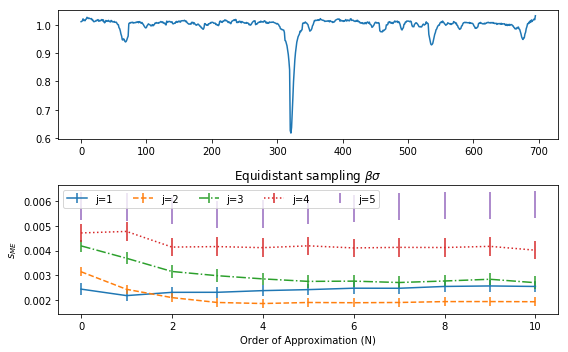


 HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits


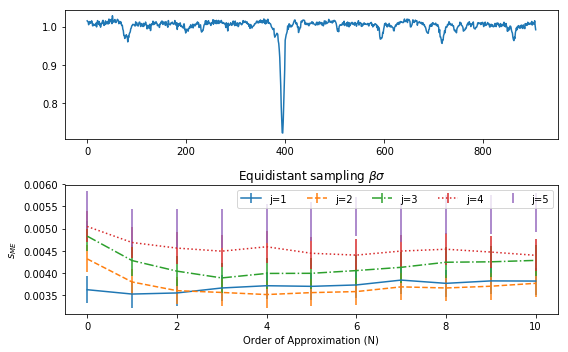

In [6]:
files = ["/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits",
     ]

for file in files:
    print("\n", os.path.split(file)[-1])
    
    #####################
    # CHANGE here
    data = fits.getdata(file)
    xi, yi = data["wavelength"], data["flux"]
    ########################
    
    betasigma_plot(yi, arb=False, returnMAD=True)